## 데이터불러오기

In [1]:
import pandas as pd

# Load the CSV files
file1_path = 'Data/지역화폐발행및이용현황_2019~2022.csv'  

file2_path = 'Data/지역화폐발행및이용현황_2023.csv'

df_2022d = pd.read_csv(file1_path, encoding='euc-kr')
df_2023 = pd.read_csv(file2_path, encoding='euc-kr')



-----


## 전처리

### 1.데이터 확인

In [2]:
df_2022d.shape

(1488, 5)

In [3]:
df_2023.shape

(372, 5)

In [4]:
df_2022d.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
0,가평군,2022-12,814.0,3600881.0,3996840.0
1,가평군,2022-11,701.0,4356413.0,3673972.0
2,가평군,2022-10,657.0,3205893.0,3586395.0
3,가평군,2022-09,832.0,4334836.0,3773560.0
4,가평군,2022-08,858.0,3091351.0,3600543.0


In [5]:
df_2023.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,4051,2140
1,가평군,2023-11,458.0,2368,2187
2,가평군,2023-10,555.0,2596,2335
3,가평군,2023-09,782.0,3113,2376
4,가평군,2023-08,473.0,3631,2392


In [6]:
len(df_2023['시군명'].unique())

31

In [7]:
df_2023.isnull().sum()

시군명            0
기준년월           0
월별신규가입자수(명)    2
월별충전액(백만원)     0
월별사용액(백만원)     0
dtype: int64

In [8]:
df_2022d.isnull().sum()

시군명              0
기준년월             0
월별신규가입자수(명)    222
월별충전액(천원)      181
월별사용액(천원)      181
dtype: int64

- 결측지가 존재하지만 월별 충전금액을 비교분석해서 지표로 활용해야할수있기떄문에 제거는 하지않고, 최빈값이나 중앙값 평균값등으로 교체해야할것같다 **논의필용**

### 2.2019년까지 있는 데이터를 2021년부터 2023년까지만 다루기위해 데이터 슬라이싱


In [9]:
df_2022d = df_2022d[df_2022d['기준년월'].str[:4].astype(int).between(2021, 2023)]

df_2022d.tail()

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
1459,화성시,2021-05,7615.0,26955815.0,27578227.0
1460,화성시,2021-04,23662.0,27897920.0,27898856.0
1461,화성시,2021-03,13378.0,18016255.0,20192514.0
1462,화성시,2021-02,23305.0,18016255.0,20192514.0
1463,화성시,2021-01,12936.0,32845088.0,31312763.0


In [10]:
df_2022d.shape

(744, 5)

### 3.금액단위를 만원단위로 맞추기 => Data1,2에대한 통일성부여

In [11]:
df_2022d['월별충전액(천원)']=round(df_2022d['월별충전액(천원)']/10) #반올림해서 소수점 제거


In [12]:
df_2022d['월별사용액(천원)']=round(df_2022d['월별사용액(천원)']/10)

In [13]:
df_2022d.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
0,가평군,2022-12,814.0,360088.0,399684.0
1,가평군,2022-11,701.0,435641.0,367397.0
2,가평군,2022-10,657.0,320589.0,358640.0
3,가평군,2022-09,832.0,433484.0,377356.0
4,가평군,2022-08,858.0,309135.0,360054.0


In [14]:
df_2023['월별충전액(백만원)']=df_2023['월별충전액(백만원)']*100

In [15]:
df_2023['월별사용액(백만원)']=df_2023['월별사용액(백만원)']*100

In [16]:
df_2023.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,405100,214000
1,가평군,2023-11,458.0,236800,218700
2,가평군,2023-10,555.0,259600,233500
3,가평군,2023-09,782.0,311300,237600
4,가평군,2023-08,473.0,363100,239200


### 4.데이터 concat

- 데이터 컬럼이름 맞춰주기()

In [17]:
df_2022d.columns=['시군명','기준년월','월별신규가입자수(명)','월별충전액(만원)','월별사용액(만원)']

In [18]:
df_2023.columns=['시군명','기준년월','월별신규가입자수(명)','월별충전액(만원)','월별사용액(만원)']

In [19]:
print(df_2023.shape)
print(df_2022d.shape)

(372, 5)
(744, 5)


In [20]:
Data2=pd.concat([df_2023,df_2022d],ignore_index=True)
Data2.to_csv('Data2.csv',index=False)
Data2.tail()

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원)
1111,화성시,2021-05,7615.0,2695582.0,2757823.0
1112,화성시,2021-04,23662.0,2789792.0,2789886.0
1113,화성시,2021-03,13378.0,1801626.0,2019251.0
1114,화성시,2021-02,23305.0,1801626.0,2019251.0
1115,화성시,2021-01,12936.0,3284509.0,3131276.0


In [21]:
Data2['기준년월'] = pd.to_datetime(Data2['기준년월'])

In [22]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   시군명          1116 non-null   object        
 1   기준년월         1116 non-null   datetime64[ns]
 2   월별신규가입자수(명)  1042 non-null   float64       
 3   월별충전액(만원)    1070 non-null   float64       
 4   월별사용액(만원)    1070 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 43.7+ KB


------
## 시각화=>Tableau 대시보드 사용

<h3>[시각화 추가]</h3>

<h4>1.상위권 7개 시군 중 하나인 평택시 시각화<h4>

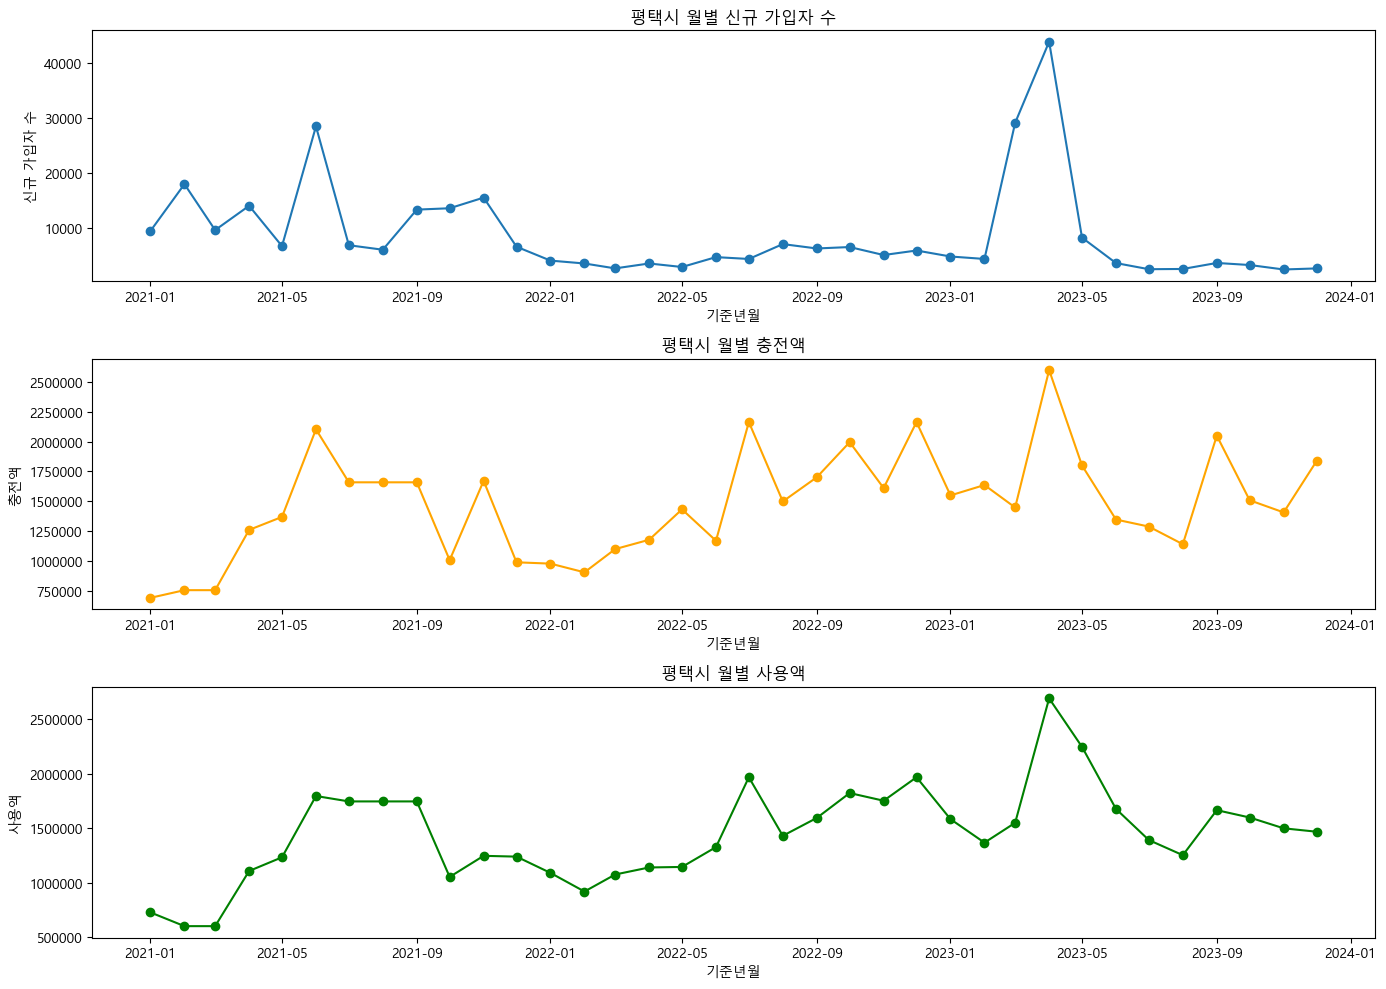

In [36]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from matplotlib.ticker import ScalarFormatter

# 평택시 데이터 필터링
pyeongtaek_df = Data2[Data2['시군명'] == '평택시']

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(pyeongtaek_df['기준년월'], pyeongtaek_df['월별신규가입자수(명)'], marker='o')
plt.title('평택시 월별 신규 가입자 수')
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(pyeongtaek_df['기준년월'], pyeongtaek_df['월별충전액(만원)'], marker='o', color='orange')
plt.title('평택시 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(pyeongtaek_df['기준년월'], pyeongtaek_df['월별사용액(만원)'], marker='o', color='green')
plt.title('평택시 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# 레이아웃 조정
plt.tight_layout()
plt.show()

<h4>2.하위권 3개 시군 중 하나인 동두천시 시각화</h4>

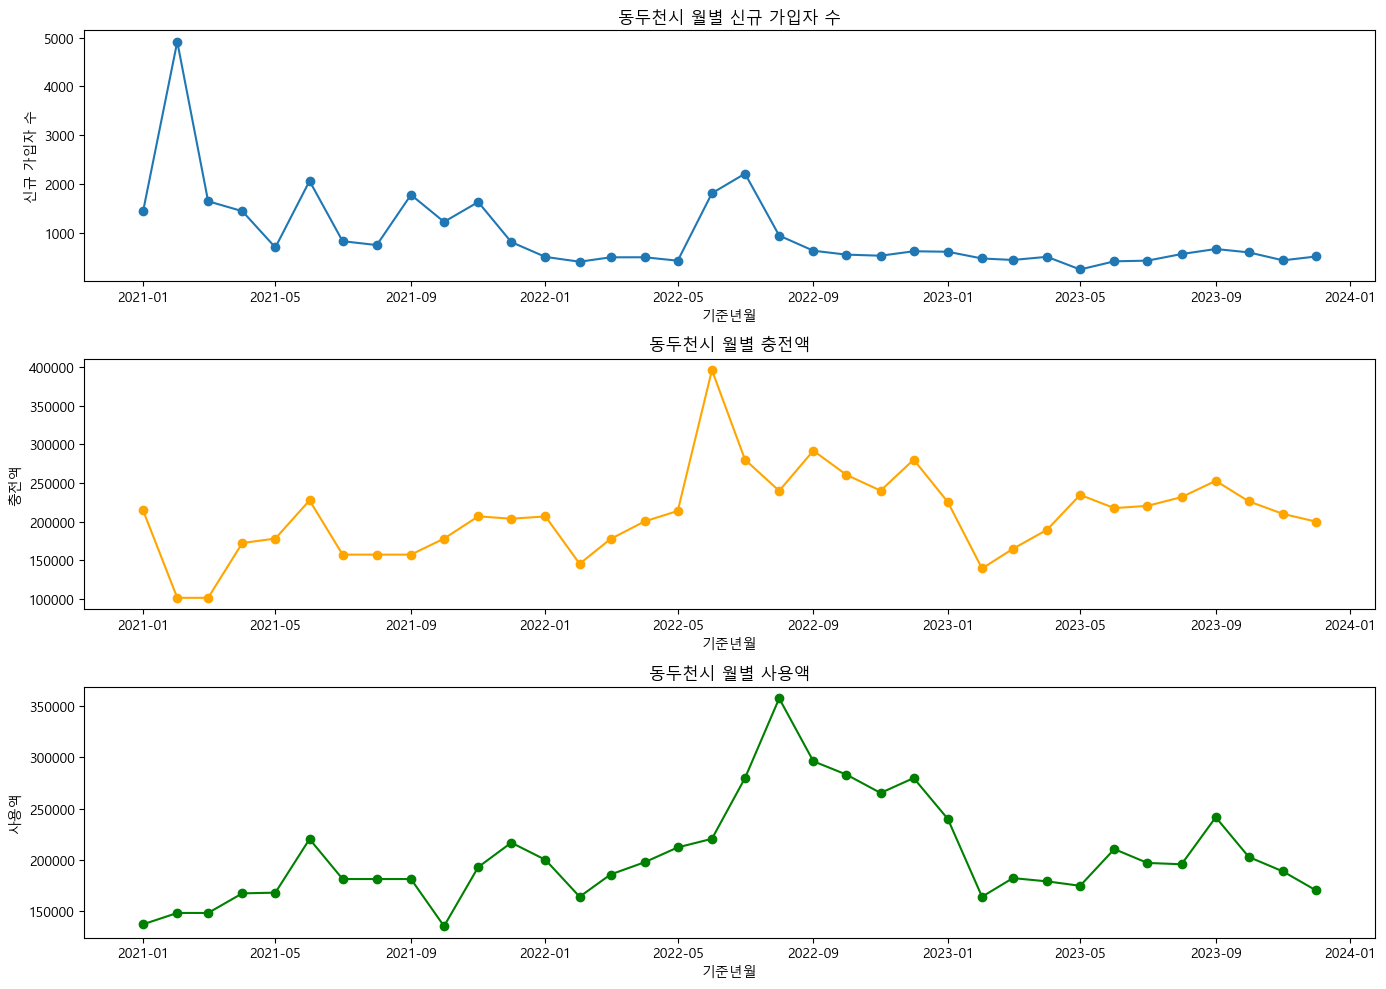

In [34]:
# 동두천시 데이터 필터링
dongducheon_df = Data2[Data2['시군명'] == '동두천시']

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(dongducheon_df['기준년월'], dongducheon_df['월별신규가입자수(명)'], marker='o')
plt.title('동두천시 월별 신규 가입자 수')
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(dongducheon_df['기준년월'], dongducheon_df['월별충전액(만원)'], marker='o', color='orange')
plt.title('동두천시 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')


# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(dongducheon_df['기준년월'], dongducheon_df['월별사용액(만원)'], marker='o', color='green')
plt.title('동두천시 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')

# 레이아웃 조정
plt.tight_layout()
plt.show()

-------


## 지표설정

### Data 1,3과 달리 Data2는 각 시군별 각 월별 총결제금액과 사용금액이 나와있으므로 각 시군별 을 월별로 점진적으로 , 수치적으로 비교할수있는 지표로 활용하는게 좋을것같다.

- 전년도 대비 결제금액 증감 %으로 지표를 설정해보자

- Data2 보다는 Data1이 년도 대비 비교가 편리할거같다

In [23]:
import pandas as pd
dff=pd.read_csv('Data/Data1_전쳐리.csv')
dff.tail()

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액
1498,2021,화성시,70대,남,93924,2.016729e+09,878.0,36744696.0,21472.0
1499,2021,화성시,70대,여,94936,2.113137e+09,948.0,31082093.0,22259.0
1500,2021,화성시,80대 이상,남,14820,2.960631e+08,128.0,3424209.0,19977.0
1501,2021,화성시,80대 이상,여,19625,4.419913e+08,191.0,6208072.0,22522.0
1502,2021,화성시,기타,-,1245634,2.980095e+10,11553.0,415381458.0,23924.0


In [24]:
import pandas as pd
import matplotlib.pyplot as plt


Data2['기준연도'] = Data2['기준년월'].dt.year

# '시군명'과 '기준연도'로 그룹화하고 '월별사용액(만원)' 총합 계산
df_group1_totalPay = Data2.groupby(['시군명', '기준연도'], as_index=False) \
              .agg(totalPay=('월별사용액(만원)', 'sum')) \
              .agg(사용자수=('월별신규가입자수(명)','sum')) \
              .sort_values(['기준연도', '시군명'])
df_group1_totalPay
df_group1_totalPay.to_csv('csv.csv',index=False)

KeyError: "Column(s) ['월별신규가입자수(명)'] do not exist"

In [ ]:
df_group1_11 = Data2.groupby(['시군명', '기준연도'], as_index=False) \
              .agg(totalPay=('월별사용액(만원)', 'sum'), 
                   totalNewSubscribers=('월별신규가입자수(명)', 'sum')) \
              .sort_values('totalPay', ascending=False)

In [ ]:
df_group1_11

,시군명,기준연도,totalPay,totalNewSubscribers
92,화성시,2023,41837000.0,90907.0
91,화성시,2022,41328810.0,70123.0
37,수원시,2022,37945657.0,98489.0
67,용인시,2022,34344709.0,88399.0
68,용인시,2023,33453000.0,79225.0
...,...,...,...,...
60,연천군,2021,1239240.0,8394.0
21,김포시,2021,0.0,0.0
22,김포시,2022,0.0,0.0
39,시흥시,2021,0.0,0.0


In [ ]:
df_group1_totalPay

,시군명,기준연도,totalPay,전년도대비변화율(%)
0,가평군,2021,1709018.0,NaN
3,고양시,2021,22776329.0,1232.71
6,과천시,2021,3499016.0,-84.64
9,광명시,2021,10231984.0,192.42
12,광주시,2021,16970792.0,65.86
...,...,...,...,...
80,파주시,2023,21181600.0,63.35
83,평택시,2023,19989300.0,-5.63
86,포천시,2023,2962800.0,-85.18
89,하남시,2023,14616600.0,393.34


In [ ]:
df_group1_totalPay.groupby('시군명')

In [ ]:
df_group1_totalPay

,시군명,기준연도,totalPay,전년도대비변화율(%)
0,가평군,2021,1709018.0,NaN
3,고양시,2021,22776329.0,1232.71
6,과천시,2021,3499016.0,-84.64
9,광명시,2021,10231984.0,192.42
12,광주시,2021,16970792.0,65.86
...,...,...,...,...
80,파주시,2023,21181600.0,63.35
83,평택시,2023,19989300.0,-5.63
86,포천시,2023,2962800.0,-85.18
89,하남시,2023,14616600.0,393.34


In [ ]:
def calculate_change(group):
    group['전년도대비변화율(%)'] = group['totalPay'].pct_change() * 100
    return group


In [ ]:
# 각 시군별로 변화율 계산
df_group1_11['전년도대비변화율(%)']=(df_group1_11['totalPay'].pct_change() * 100).round(2)

# # 변화율 소수점 이하 두 자리로 표시
# data['전년도대비변화율(%)'] = data['전년도대비변화율(%)'].round(2)

# data


In [ ]:
df_group1_totalPay

,시군명,기준연도,totalPay,전년도대비변화율(%)
0,가평군,2021,1709018.0,NaN
3,고양시,2021,22776329.0,1232.71
6,과천시,2021,3499016.0,-84.64
9,광명시,2021,10231984.0,192.42
12,광주시,2021,16970792.0,65.86
...,...,...,...,...
80,파주시,2023,21181600.0,63.35
83,평택시,2023,19989300.0,-5.63
86,포천시,2023,2962800.0,-85.18
89,하남시,2023,14616600.0,393.34


In [ ]:
df_group1_totalPay_2021=df_group1_11[df_group1_totalPay['기준연도']==2021]
df_group1_totalPay_2021.head(5)

C:\Users\home\AppData\Local\Temp\ipykernel_11332\1202317831.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group1_totalPay_2021=df_group1_11[df_group1_totalPay['기준연도']==2021]


,시군명,기준연도,totalPay,totalNewSubscribers,전년도대비변화율(%)
90,화성시,2021,32995601.0,167965.0,-1.37
36,수원시,2021,32086696.0,238658.0,-0.43
66,용인시,2021,28349528.0,206404.0,-11.65
42,안산시,2021,25658275.0,151781.0,-2.82
30,부천시,2021,24694265.0,180770.0,-1.44


In [ ]:
df_group1_totalPay_2022=df_group1_11[df_group1_totalPay['기준연도']==2022].sort_values('totalNewSubscribers',inplace=True)
df_group1_totalPay_2022.head(5)

C:\Users\home\AppData\Local\Temp\ipykernel_11332\1001965836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group1_totalPay_2022=df_group1_11[df_group1_totalPay['기준연도']==2022].sort_values('totalNewSubscribers',inplace=True)
C:\Users\home\AppData\Local\Temp\ipykernel_11332\1001965836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1_totalPay_2022=df_group1_11[df_group1_totalPay['기준연도']==2022].sort_values('totalNewSubscribers',inplace=True)


AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
df_group1_totalPay_2022.sort_values('totalNewSubscribers',inplace=True)
df_group1_totalPay_2022.head(5)

AttributeError: 'NoneType' object has no attribute 'sort_values'

In [ ]:
df_group1_totalPay_2023=df_group1_11[df_group1_totalPay['기준연도']==2023]
df_group1_totalPay_2023.head(5)

C:\Users\home\AppData\Local\Temp\ipykernel_11332\3458533081.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group1_totalPay_2023=df_group1_11[df_group1_totalPay['기준연도']==2023]


,시군명,기준연도,totalPay,totalNewSubscribers,전년도대비변화율(%)
92,화성시,2023,41837000.0,90907.0,NaN
68,용인시,2023,33453000.0,79225.0,-2.60
35,성남시,2023,32920900.0,90012.0,-0.23
38,수원시,2023,32224400.0,83697.0,-0.73
41,시흥시,2023,26714100.0,38896.0,-0.83


In [ ]:
df_group1_totalPay_2022.tail(7)

,시군명,기준연도,totalPay,totalNewSubscribers,전년도대비변화율(%)
7,과천시,2022,4890193.0,25607.0,-8.83
85,포천시,2022,4365777.0,15076.0,-10.52
1,가평군,2022,3729533.0,8291.0,-0.52
28,동두천시,2022,2940920.0,9691.0,-0.74
61,연천군,2022,2143581.0,7911.0,-5.97
22,김포시,2022,0.0,0.0,NaN
40,시흥시,2022,0.0,0.0,NaN
